In [1]:
# Import all the packages you need
import numpy as np
import matplotlib.pyplot as plt
import PIL, urllib
import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
%matplotlib inline

In [40]:
# Load the image from a website
# Southern Ring Nebula
# img_url = 'https://live.staticflickr.com/65535/52212049510_73fbea9957_b.jpg'
# Carina Nebula
# img_url = 'https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/main_image_star-forming_region_carina_nircam_final-5mb.jpg'
# Cartwheel Galaxy
img_url = 'https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/stsci-01g8jzq6gwxhex15pyy60wdrsk.png?itok=1gQYAKHT'

# Load the image from the URL
img_url_load = PIL.Image.open(urllib.request.urlopen(img_url))
img_raw = img_url_load.getdata()

# Reshape the image
img_full = np.asarray(img_raw).reshape((img_raw.size[1], img_raw.size[0], 3))

# PICK ONE:
# (1) Make it grayscale
img = rgb2gray(img_full)

# (2) Pick a color channel
# red
# img = img_full[:,:,0]
# green
# img = img_full[:,:,1]
# blue
# img = img_full[:,:,2]

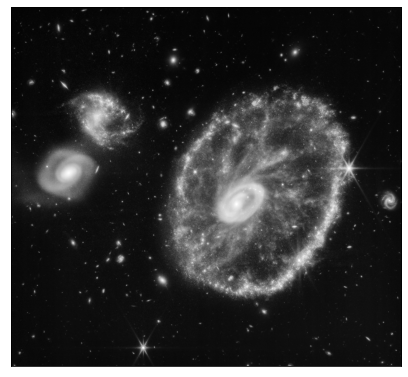

In [41]:
# Plot the image
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2,)


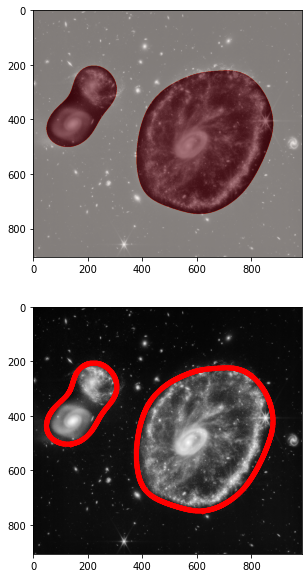

In [42]:
# Make the image smoother so edges are less noisy
# Higher sigma means a smoother image
image_gauss = skimage.filters.gaussian(img, sigma=50)

# Set the threshold for the edge detection based on the distribution of pixel values
image_th = skimage.filters.threshold_otsu(image_gauss)

# Find the edge contour!
contour = skimage.measure.find_contours(image_gauss>image_th, level = 0.5)

# Plot the selected regions on the image
fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0].imshow(img, cmap = 'gray')
ax[0].imshow(image_gauss>image_th, alpha = 0.5, cmap = 'Reds')

# Plot the two main edge contours on the image
ax[1].imshow(img, cmap = 'gray')
print(np.shape(contour))
for i in range(len(contour)):
  ax[1].plot(contour[0][:,1],contour[0][:,0],'-r', linewidth = 5)
  ax[1].plot(contour[1][:,1],contour[1][:,0],'-r', linewidth = 5)